# <font color ='purple'>Andrielly Pereira
#  <font color='purple'>Teste A/B

In [2]:
# versão da linguagem python
from platform import python_version
print('versão de Linguagem Python Usado:', python_version())

versão de Linguagem Python Usado: 3.11.1


![title](imagens/projeto.png)

## Carregando o Conjunto de Dados

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [1]:
# Imports
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs

# Formatação dos gráficos
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Andrielly  Pereira" --iversions

Author: Andrielly  Pereira

numpy     : 1.23.5
matplotlib: 3.6.3
scipy     : 1.10.1
pandas    : 1.5.3



## Carregando e Compreendendo os Dados

Variante ad: a pessoa viu o anúncio.

Variante psa: viu apenas o anúncio de serviço público.

In [33]:
# Carregando o datase
df_vendas = pd.read_csv('dados/marketing_AB.csv')

In [38]:
# Visualizar
df_vendas.head()

,index,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [87]:
df_vendas=df_vendas.rename(columns = {
    "Unnamed: 0" : "index",
    "user id": "id_usuario",
    "grupo":"variante",
    "converte":"compra",
    "total ads":"total_anuncios",
    "most ads day":"dia",
    "most ads hour":"hora"
})

In [88]:
# Visualizando os dados
df_vendas.head()

,index,id_usuario,variante,compra,total_anuncios,dia,hora
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [60]:
# Visualizando as últimas linhas
df_vendas.tail()

,index,id_usuario,grupo,converte,total_anuncios,dia,hora
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


## Análise Exploratória e Cálculo de Probabilidade

In [41]:
# shape dos dados
df_vendas.shape

(588101, 7)

In [77]:
# Tipos dos dados
df_vendas.dtypes

index              int64
id_usuario         int64
grupo             object
converte            bool
total_anuncios     int64
dia               object
hora               int64
dtype: object

In [62]:
# Dia em que a pessoa viu a maior quantidade de anúncios
df_vendas['dia'].max()

'Wednesday'

In [63]:
# Dia em que a pessoa viu a menor quantidade de anúncios
df_vendas['dia'].min()

'Friday'

In [65]:
# Hora do dia em que a pessoa viu a maior quantidade de anúncios
df_vendas['hora'].max()

23

In [66]:
# Hora do dia em que a pessoa viu a menor quantidade de anúncios
df_vendas['hora'].min()

0

In [67]:
# verificação de valores nulos
df_vendas.isnull().sum()

index             0
id_usuario        0
grupo             0
converte          0
total_anuncios    0
dia               0
hora              0
dtype: int64

In [68]:
# verificação de IDs duplicados
df_vendas.id_usuario.value_counts().count()

588101

In [69]:
# Proporção de resuldados conversão
df_vendas.compra.value_counts()

False    573258
True      14843
Name: converte, dtype: int64

In [70]:
# proporção das variantes mostradas aos usuários
df_vendas.variante.value_counts()

ad     564577
psa     23524
Name: grupo, dtype: int64

Calculando probabilidades basicas

**Variante psa é o grupo de controle. Variante ad é o grupo de teste ou tratamento.**

In [73]:
# Probabilidade de um usuário visualizar psa
df_vendas[df_vendas=='psa'].shape[0] / df_vendas.shape[0] * 100

100.0

In [74]:
# Probabilidade de um usuário visualizar qualquer variante
df_vendas.shape[0] / df_vendas.shape[0] * 100

100.0

In [75]:
# Probabilidade de um usuário visualizar o anúncio
df_vendas[df_vendas == 'ad'].shape[0] / df_vendas.shape[0] * 100

100.0

In [83]:
# total de compras realizadas(Conversões)
df_vendas.compra.sum()

14843

In [90]:
# Total de compras realizada quando o a pessoa viu o anúncio  - ad
df_vendas[df_vendas.variante == 'ad'].compra.sum()

14423

In [91]:
# Total de compras realizadas
df_vendas.compra.sum()

14843

In [94]:
# total de compras realizada quando a pessoa viu apenas o anúncio de serviço público - psa
df_vendas[df_vendas.variante == 'psa'].compra.sum()

420

In [95]:
# Probabilidade de conversão independente da variante recebida
df_vendas.compra.mean()

0.02523886203220195

In [96]:
# Dado que um indivíduo estava no grupo de controle, qual é a probabilidade de conversão?
df_vendas[df_vendas.variante =='psa'].compra.mean()

0.01785410644448223

In [98]:
# Dado que um indivíduo estava no grupo de tratamento, qual é a probabilidade de conversão?
df_vendas[df_vendas.variante == 'ad'].compra.mean()

0.025546559636683747

Como vemos a probabilidade de uma pessoa assistir ao anúncio é de 100% e a probabilidade total de conversão é de 25%
Precisamos checar se temos evidências suficientes para dizer que o grupo de tratamento leva a um aumento das conversões.

## Tarefa 1 - Configurando o Experimento

Se a campanha foi bem-sucedida, quanto desse sucesso pode ser atribuído aos anúncios?

Variante psa: viu apenas o anúncio de serviço público

Variante ad: viu o anúncio

Observe que, devido ao registro de data e hora associado a cada evento, você pode tecnicamente executar um teste de hipótese continuamente à medida que cada evento é observado.

No entanto, a questão difícil é saber quando parar assim que uma variante for considerada significativamente melhor do que outra ou isso precisa acontecer de forma consistente por um determinado período de tempo? Quanto tempo até você decidir que nenhuma variante é melhor que a outra? Converse com a área de negócio para definir a melhor abordagem para o teste e apresentaremos algumas dicas durante este trabalho.

Essas questões são as partes mais difíceis associadas aos Testes A/B e a análise em geral.

Por enquanto, considere que você precisa tomar uma decisão apenas com base nos dados fornecidos. Se você quiser assumir que a variante psa é melhor, a menos que a nova variante prove ser definitivamente melhor em uma taxa de erro Tipo I de 5%, quais deveriam ser suas hipóteses nula e alternativa? 

Você pode definir suas hipóteses em termos de palavras ou em notação como $p_{psa}$ e $p_{ad}$, que são as probabilidades de conversão para as variantes nova e antiga.

- H0: Pad - Ppsa = 0
- H1: Pad - Ppsa > 0

H0 nos diz que a diferença de probabilidade dos dois grupos é igual a zero.

H1 nos diz que a diferença de probabilidade dos dois grupos é maior do que zero.

### Pré-Processamento dos Dados

Faremos alguns cálculos pesados e para simplificar o processo, iremos filtrar os dados e usar apenas um dos dias. 

In [128]:
# Vamos apenas trabalhar com os dados de Wednesday(Quarta-feira)
df_vendas_Wednesday = df_vendas[df_vendas['dia'] == 'Wednesday']

In [129]:
# Visualizar os dados
df_vendas_Wednesday.head()

,index,id_usuario,variante,compra,total_anuncios,dia,hora
6,6,1116205,ad,False,264,Wednesday,13
10,10,1257223,ad,False,209,Wednesday,11
11,11,1637531,ad,False,47,Wednesday,13
15,15,1461774,ad,True,9,Wednesday,18
17,17,1118924,ad,False,26,Wednesday,11


In [130]:
# shape
df_vendas_Wednesday.shape

(80908, 7)

### Criação do Baseline

Vamos criar um baseline (linha base) da taxa de conversão antes de executar o teste de hipótese. Assim, saberemos a taxa de conversão base e o aumento desejado em compras que gostaríamos de testar.

* **psa** será o grupo de controle 
* **ad** será o grupo de teste

In [131]:
# Geramos um dataframe
fd_ab_Wednesday2 = df_vendas_Wednesday[['variante','compra']]
fd_ab_Wednesday2.head()

,variante,compra
6,ad,False
10,ad,False
11,ad,False
15,ad,True
17,ad,False


In [107]:
# Shape
fd_ab_Wednesday2.shape

(80908, 2)

In [133]:
# alterar o nome das colunas
fd_ab_Wednesday2.columns = ['grupo','conversao']
fd_ab_Wednesday2.head()

,grupo,conversao
6,ad,False
10,ad,False
11,ad,False
15,ad,True
17,ad,False


In [134]:
# Tabela pivot
fd_ab_sumario = fd_ab_Wednesday2.pivot_table( values = 'conversao', index = 'grupo', aggfunc = np.sum)

In [135]:
# Visualiza os dados
fd_ab_sumario.head()

,conversao
grupo,
ad,1963
psa,55


In [136]:
# sumario com total
fd_ab_sumario['total'] = fd_ab_Wednesday2.pivot_table(values = 'conversao', index = 'grupo', aggfunc = lambda x: len(x))

In [138]:
# sumario com taxa
fd_ab_sumario['taxa'] = fd_ab_Wednesday2.pivot_table(values= 'conversao', index = 'grupo')

In [150]:
# Visualizar dados
fd_ab_sumario.head()

,conversao,total,taxa
grupo,,,
ad,1963,77418,0.025356
psa,55,3490,0.015759


In [148]:
# Obtemos os valores da variante psa
conversao_ad = fd_ab_sumario['conversao'][0]
total_ad = fd_ab_sumario['total'][0]
taxa_ad = fd_ab_sumario['taxa'][0]

In [154]:
# Imprima os valores de psa
print(conversao_ad)
print(total_ad)
print(taxa_ad)

1963
77418
0.025355860394223564


In [152]:
# Obtemos os valores da variante psa
conversao_psa = fd_ab_sumario['conversao'][1]
total_psa = fd_ab_sumario['total'][1]
taxa_psa = fd_ab_sumario['taxa'][1]

In [153]:
# Imprime os valores de psa
print(conversao_psa)
print(total_psa)
print(taxa_psa)

55
3490
0.015759312320916905


Taxa de conversão da linha de base (Baseline conversion rate).

Igual a $p$ no contexto de uma distribuição binomial e $p$ é a probabilidade de sucesso.

In [155]:
# Taxa de conversão da linha base
conversao_base = taxa_psa
conversao_base

0.015759312320916905

Efeito mínimo detectável (Minimum Detectable Effect).

Às vezes referido como nível de significância prática.

In [158]:
# efeito minimo detectável
efeito_min = taxa_ad - taxa_psa
efeito_min

0.00959654807330666

## Tarefa 2 - Execução do Teste de Hipóteses

Executamos o teste de hipóteses e registramos a taxa de sucesso de cada grupo.

Poder estatístico ou sensibilidade.

Igual a 1 - $\beta$. 

Normalmente 80% é usado para a maioria das análises. É a probabilidade de rejeitar a hipótese nula quando a hipótese nula é de fato falsa.

Parâmetros que usaremos para executar o teste:

1- Alfa (Nível de significância) $\alpha$: normalmente 5%; probabilidade de rejeitar a hipótese nula quando a hipótese nula for verdadeira

2- Beta $\beta$: probabilidade de aceitar a hipótese nula quando a hipótese nula é realmente falsa.

In [159]:
# Definindo os parâmetros
alfa = 0.5
beta = 0.2

In [160]:
# Tamanho da amostra
n = 50000

Podemos supor que a distribuição de nosso grupo de controle é binomial porque os dados são uma série de tentativas de Bernoulli, em que cada tentativa tem apenas dois resultados possíveis (semelhante a um cara ou coroa).
 
 Para o teste usaremos a função binom() do SciPy:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [163]:
# teste binomial(usando padrão de 5% para o nível de significância)
teste_binom = scs.binom(n, p = conversao_base)

In [164]:
# teste binom com efeito mínimo (no nosso exemplo 0.04 para o nível de significância)
teste_binom_mde = scs.binom(n, p = conversao_base + efeito_min)

Agora visualizamos a probability mass function (pmf).

<BarContainer object of 50001 artists>

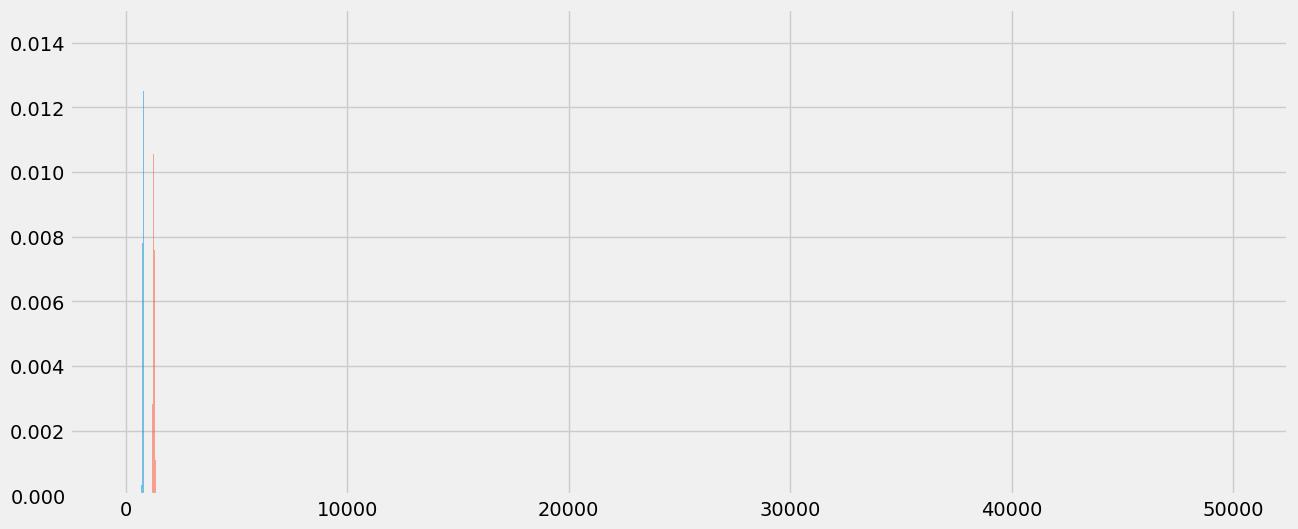

In [168]:
# plot

# área de plotagem
fig, ax = plt.subplots(figsize = (14, 6))

# definimos diversos valores para x
x = np.linspace(0, int(n), int(n) + 1)

# plotamos os resultados com a pmf e alfa de 0.5
ax.bar(x, teste_binom.pmf(x), alpha = 0.5)
ax.bar(x, teste_binom_mde.pmf(x), alpha = 0.5)

## Tarefa 3 - Plot da Distribuição

Criamos o Plot da distribuição da diferença entre as duas amostras e comparamos os resultados.

Podemos comparar os dois grupos traçando a distribuição do grupo de controle e calculando a probabilidade de obter o resultado de nosso grupo de teste.

Text(0, 0.5, 'Probabilidade')

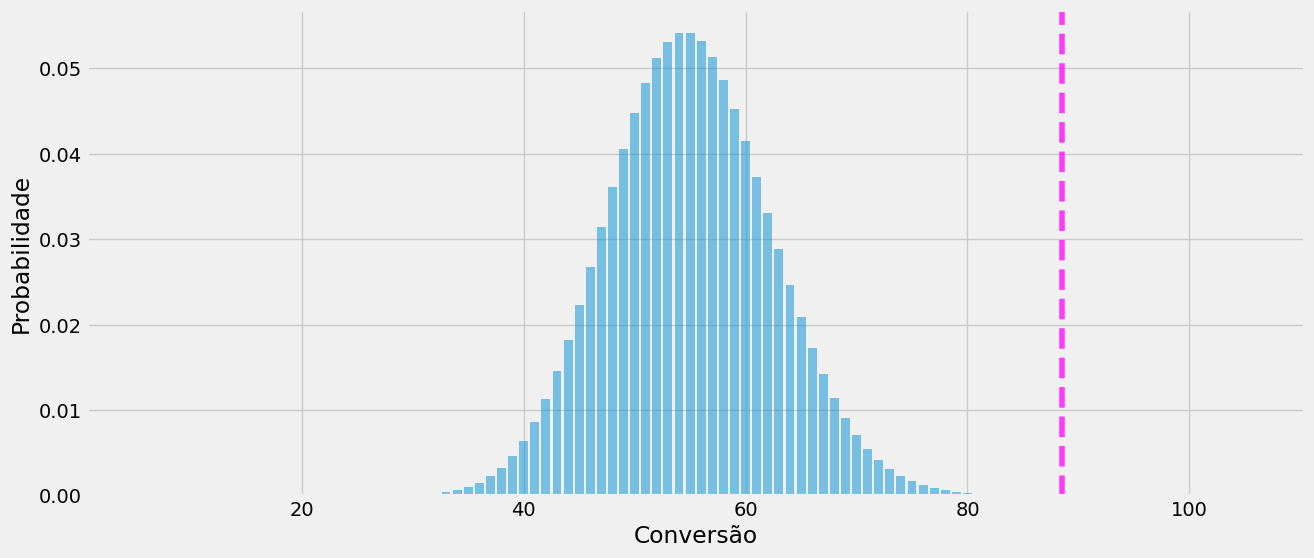

In [169]:
# plot da distribuição do gropo psa(controle)

# área de plotagem
fig, ax = plt.subplots(figsize = (14,6))

# Teste de psa
x = np.linspace(conversao_psa - 49, conversao_psa + 50, 100)
y = scs.binom(total_psa, taxa_psa).pmf(x)

# Cria a barra vertical
ax.bar(x, y, alpha = 0.5)
ax.axvline(x = taxa_ad * total_psa, c = 'magenta', alpha = 0.75, linestyle = '--')

# Labels
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')

Text(0, 0.5, 'Probabilidade')

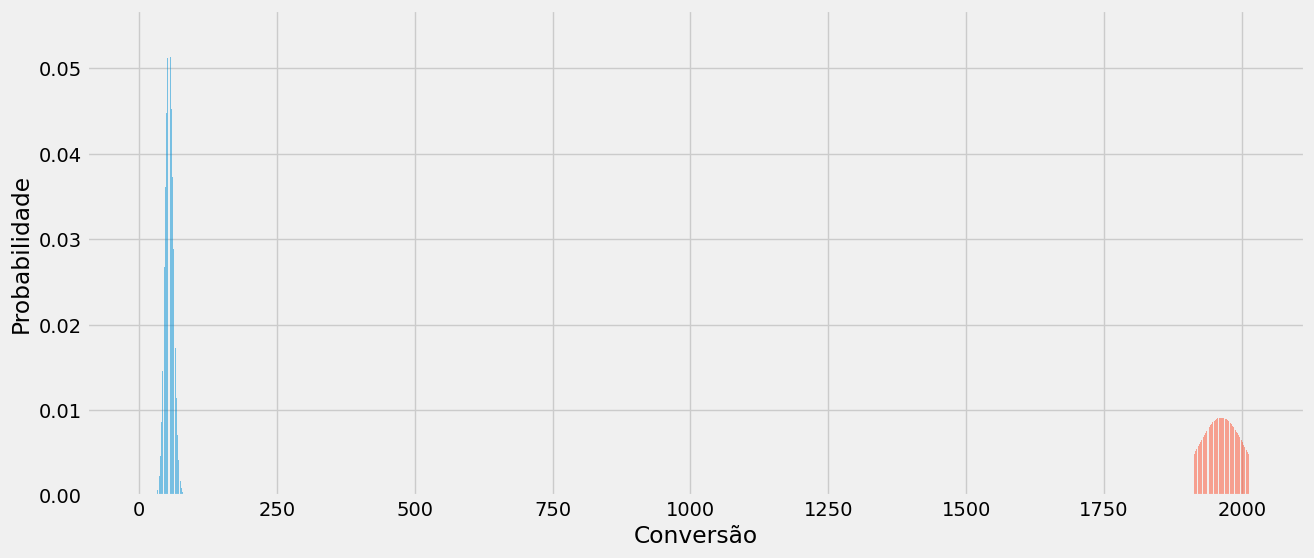

In [172]:
# Plot da distribuição dos 2 grupos

# Área de plotagem 
fig, ax = plt.subplots(figsize = (14,6))

# Gráfico de psa
xpsa = np.linspace(conversao_psa - 49, conversao_psa + 50, 100)
ypsa = scs.binom(total_psa, taxa_psa).pmf(xA)
ax.bar(xpsa, ypsa, alpha = 0.5)

# Gráfico de ad
xad = np.linspace(conversao_ad - 49, conversao_ad + 50, 100)
yad = scs.binom(total_ad, taxa_ad).pmf(xad)
ax.bar(xad, yad, alpha = 0.5)

# Labels
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')

Podemos ver que o grupo de teste converteu mais usuários do que o grupo de controle. Também podemos ver que o pico dos resultados do grupo de teste é inferior ao do grupo de controle. 

Mas como interpretamos a diferença no pico da probabilidade? 

Devemos nos concentrar, em vez disso, na taxa de conversão para que tenhamos uma comparação de termos equivalentes. Para calcular isso, precisamos padronizar os dados e comparar a probabilidade de sucesso, p, para cada grupo.

In [173]:
# Ajusta o nome das variáveis

# Probabilidades (taxas de conversão)
p_psa = taxa_psa
p_ad = taxa_ad

# Número de conversões
N_psa = 3821
N_ad = 5000

In [174]:
# Erro padrão (standard error) para a média de ambos os grupos
SE_psa = np.sqrt(p_psa* (1 - p_psa)) / np.sqrt(total_psa)
SE_ad = np.sqrt(p_ad * (1 - p_ad)) / np.sqrt(total_ad)

In [175]:
# Print
print(SE_psa)
print(SE_ad)

0.002108174592744269
0.0005649906230341466


Text(0, 0.5, 'PDF - Probability Density Function')

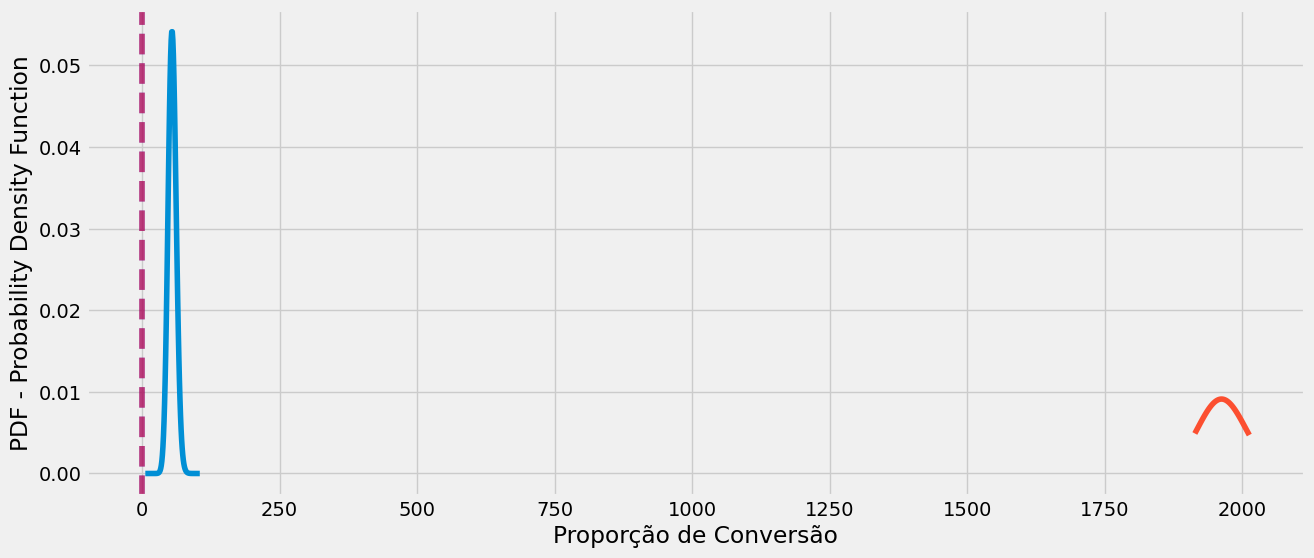

In [176]:
# Plot das distribuições das hipóteses nula e alternativa

# Área de plotagem
fig, ax = plt.subplots(figsize = (14,6))

# Dados para a variável aleatória
x = np.linspace(0, p_ad - p_psa, 100)

# Distribuição de A
yA = scs.norm(p_psa, SE_psa).pdf(x)
ax.plot(xpsa, ypsa)
ax.axvline(x = p_psa, c = 'blue', alpha = 0.5, linestyle = '--')

# Distribuição de B
yB = scs.norm(p_ad, SE_ad).pdf(x)
ax.plot(xad, yad)
ax.axvline(x = p_ad, c = 'red', alpha = 0.5, linestyle = '--')

# Labels
plt.xlabel('Proporção de Conversão')
plt.ylabel('PDF - Probability Density Function')

igual à diferença média entre o grupo de controle e teste.

**Variância da Soma**

Lembre-se de que a hipótese nula afirma que a diferença de probabilidade entre os dois grupos é zero. Portanto, a média para essa distribuição normal será zero. A outra propriedade de que precisaremos para a distribuição normal é o desvio padrão ou a variância.

Observação: a variância é o desvio padrão ao quadrado. A variância da diferença dependerá das variâncias da probabilidade para ambos os grupos.

Leia o manual em pdf **Variância da Soma** para compreender uma importante propriedade da variância.

In [177]:
# Calculando a probabilidade agrupada
prob_agrupada = (p_psa * N_psa + p_ad * N_ad) / (N_psa + N_ad)

In [179]:
# Calculando z
z = (p_ad - p_psa) / (prob_agrupada * (1 - prob_agrupada) * (1 / N_psa + 1 / N_ad))**0.5
z

3.1004562649078355

In [180]:
# Verificamos se z é maior que 1.64 (nível de significância de 0.05)
z > 1.64

True

### Plot da Distribuição de Probabilidade

In [181]:
# Função que retorna a probabilidade agrupada para 2 amostras
def prob_agrupada_func(N_psa, N_ad, X_psa, X_ad):
    return (X_psa + X_ad) / (N_psa + N_ad)

In [182]:
# Função que retorna o erro padrão agrupado para 2 amostras
def erro_padrao_agrupado_func(N_psa, N_ad, X_psa, X_ad):
    p_hat = prob_agrupada_func(N_psa, N_ad, X_psa, X_ad)
    SE = np.sqrt(p_hat * (1 - p_hat) * (1 / N_psa + 1 / N_ad))
    return SE

In [183]:
# Retorna o valor z para um determinado nível de significância
def z_val(sig_level = 0.05, two_tailed = True):
    
    # Gera distribuição para o valor z
    z_dist = scs.norm()
    
    # Verifica se devemos checar as duas caudas
    if two_tailed:
        sig_level = sig_level/2
        area = 1 - sig_level
    else:
        area = 1 - sig_level

    # Valor de z
    z = z_dist.ppf(area)

    return z

In [184]:
# Calcula o intervalo de confiança
def confidence_interval(sample_mean = 0, sample_std = 1, sample_size = 1, sig_level = 0.05):
    
    # Calcula o valor de z
    z = z_val(sig_level)

    # Limites à esquerda e direita
    left = sample_mean - z * sample_std / np.sqrt(sample_size)
    right = sample_mean + z * sample_std / np.sqrt(sample_size)

    return (left, right)

In [185]:
# Função que calcula o intervalo de confiança de duas caudas 
def plot_CI(ax, 
            mu, 
            s, 
            sig_level = 0.05, 
            color = 'grey'):

    # Calcula o intervalo de confiança
    left, right = confidence_interval(sample_mean = mu, sample_std = s, sig_level = sig_level)
    
    # Inclui o intervalo no gráfico
    ax.axvline(left, c = color, linestyle = '--', alpha = 0.5)
    ax.axvline(right, c = color, linestyle = '--', alpha = 0.5)

In [186]:
# Função para o plot de uma distribuição normal
def plot_norm_dist(ax, 
                   mu, 
                   std, 
                   with_CI = False, 
                   sig_level = 0.05, 
                   label = None):

    # Gera valores para a variável aleatória x
    x = np.linspace(mu - 12 * std, mu + 12 * std, 1000)
    
    # Cria a distribuição normal
    y = scs.norm(mu, std).pdf(x)
    
    # Plot
    ax.plot(x, y, label = label)

    # Se tivermos intervalo de confiança, incluímos no plot
    if with_CI:
        plot_CI(ax, mu, std, sig_level = sig_level)

Função para o plot da distribuição de hipótese nula onde, se não houver mudança real, a distribuição das diferenças entre os grupos de teste e controle será normalmente distribuída.

In [187]:
# Função para o plot da distribuição da H0
def plot_H0(ax, stderr):
    plot_norm_dist(ax, 0, stderr, label = "H0 - Hipótese Nula")
    plot_CI(ax, mu = 0, s = stderr, sig_level = 0.05)

Função para o plot da distribuição de hipótese alternativa onde, se houver uma mudança real, a distribuição das diferenças entre o teste e os grupos de controle será normalmente distribuída e centralizada em torno de d_hat

In [188]:
def plot_H1(ax, stderr, d_hat):
    plot_norm_dist(ax, d_hat, stderr, label = "H1 - Hipótese Alternativa")

In [189]:
# Função que preenche entre o limite de significância superior e a distribuição para hipótese alternativa
def show_area(ax, d_hat, stderr, sig_level):

    # Intervalo de confiança
    left, right = confidence_interval(sample_mean = 0, sample_std = stderr, sig_level = sig_level)
    
    # Valores para x
    x = np.linspace(-12 * stderr, 12 * stderr, 1000)
    
    # H0
    null = ab_dist(stderr, 'controle')
    
    # H1
    alternative = ab_dist(stderr, d_hat, 'teste')

    # Se o tipo da área for igual a power
    # Preenchemos entre o limite de significância superior e a distribuição para hipótese alternativa
    ax.fill_between(x, 0, alternative.pdf(x), color = 'green', alpha = 0.25, where = (x > right))
    ax.text(-3 * stderr, null.pdf(0), 'power = {0:.3f}'.format(1 - alternative.cdf(right)), 
                fontsize = 12, ha = 'right', color = 'k')

In [190]:
# Função que retorna um objeto de distribuição dependendo do tipo de grupo
def ab_dist(stderr, d_hat = 0, group_type = 'controle'):

    # Verifica o tipo de grupo
    if group_type == 'controle':
        sample_mean = 0
    elif group_type == 'teste':
        sample_mean = d_hat

    # Cria uma distribuição normal que depende da média e do desvio padrão
    dist = scs.norm(sample_mean, stderr)
    return dist

In [191]:
# Função que retorna o valor p
def p_val(N_psa, N_ad, p_psa, p_ad):
    return scs.binom(N_psa, p_psa).pmf(p_ad * N_ad)

In [194]:
def abplot_func(N_psa, 
                N_ad, 
                bcr, 
                d_hat, 
                sig_level = 0.05, 
                show_p_value = False,
                show_legend = True):
   
    # Define a área de plotagem
    fig, ax = plt.subplots(figsize = (14, 8))

    # Define parâmetros para encontrar o erro padrão agrupado
    X_psa = bcr * N_psa
    X_ad = (bcr + d_hat) * N_ad
    stderr = erro_padrao_agrupado_func(N_psa, N_ad, X_psa, X_ad)

    # Plot da distribuição da hipótese nula e alternativa
    plot_H0(ax, stderr)
    plot_H1(ax, stderr, d_hat)

    # Definir a extensão da área do plot
    ax.set_xlim(-8 * stderr, 8 * stderr)

    # Ajustamos o gráfico e preenchemos a área interior
    show_area(ax, d_hat, stderr, sig_level)

    # Mostramos valores-p com base nas distribuições para os dois grupos
    if show_p_value:
        null = ab_dist(stderr, 'controle')
        p_value = p_val(N_psa, N_ad, bcr, bcr + d_hat)
        ax.text(3 * stderr, null.pdf(0), 'Valor-p = {0:.4f}'.format(p_value), fontsize = 14, ha = 'left')

    # Mostra a legenda
    if show_legend:
        plt.legend()

    plt.xlabel('d')
    plt.ylabel('PDF')
    plt.show()

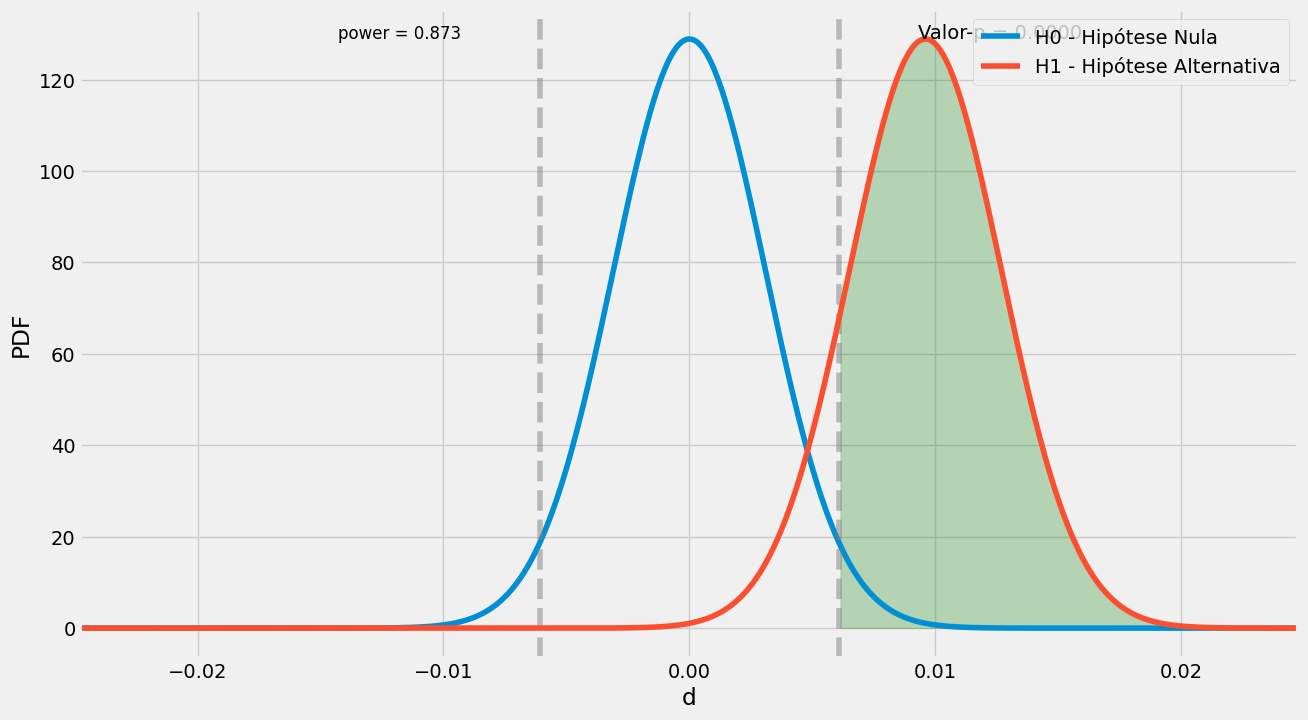

In [195]:
# Definimos os parâmetros e executamos a função
n = N_psa + N_ad
conversao_base = p_psa 
d_hat = p_ad - p_psa
abplot_func(N_psa, N_ad, conversao_base, d_hat, show_p_value = True)

Visualmente, o gráfico para as hipóteses nula e alternativa é muito semelhante aos outros gráficos acima. Felizmente, as duas curvas têm formato idêntico, portanto, podemos apenas comparar a distância entre as médias das duas distribuições. Podemos ver que a curva de hipótese alternativa sugere que o grupo de teste tem uma taxa de conversão maior do que o grupo de controle. Este gráfico também pode ser usado para determinar diretamente o poder estatístico.

## Tarefa 4 - Calculando o Poder Estatístico

Poder Estatístico e Nível de Significância

É mais fácil definir o poder estatístico e o nível de significância mostrando primeiro como eles são representados no gráfico da hipótese nula e alternativa. Podemos retornar uma visualização do poder estatístico adicionando o parâmetro show_power = True

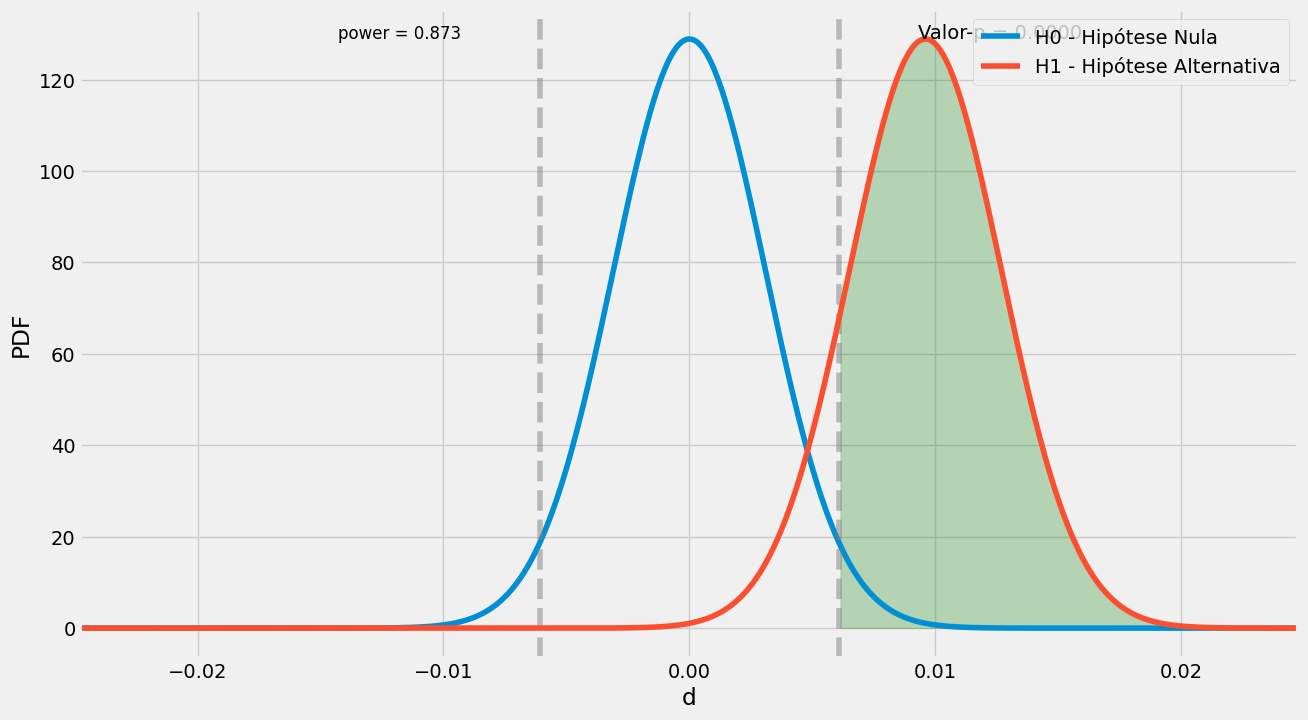

In [196]:
# Executa a função
abplot_func(N_psa, N_ad, conversao_base, d_hat, show_p_value = True)

A área sombreada em verde representa o poder estatístico e o valor calculado para o poder também é exibido no gráfico. As linhas tracejadas em cinza no gráfico acima representam o intervalo de confiança (95% para o gráfico acima) para a hipótese nula. O poder estatístico é calculado encontrando a área sob a distribuição de hipótese alternativa e fora do intervalo de confiança da hipótese nula.

Depois de executar nosso experimento, obtemos uma taxa de conversão resultante para ambos os grupos. Se calcularmos a diferença entre as taxas de conversão, acabamos com um resultado, a diferença ou o efeito de uma pessoa assistir ao anúncio. Nossa tarefa é determinar de qual população esse resultado veio, a hipótese nula ou a hipótese alternativa.

A área sob a curva da hipótese alternativa é igual a 1. Se os anúncios foram bem-sucedidos, o poder é a probabilidade de aceitarmos a hipótese alternativa e rejeitarmos a hipótese nula e é igual à área sombreada em verde (verdadeiro positivo). A área oposta sob a curva alternativa é a probabilidade de não rejeitarmos a hipótese nula e rejeitarmos a hipótese alternativa (falso negativo). Isso é conhecido como beta no teste A/B ou teste de hipótese e é mostrado abaixo.

Se a hipótese nula for verdadeira e realmente não houver diferença entre os grupos de controle e teste, o nível de significância é a probabilidade de rejeitarmos a hipótese nula e aceitarmos a hipótese alternativa (falso positivo). Um falso positivo é quando concluímos erroneamente que os anúncios foram bem-sucedidos. Este valor é baixo porque queremos limitar essa probabilidade.

Muitas vezes, um problema será fornecido com um nível de confiança desejado em vez do nível de significância. Um nível de confiança típico de 95% para um teste A / B corresponde a um nível de significância de 0,05.

Os experimentos são normalmente configurados para uma potência mínima desejada de 80%. Se os anúncios foram bem-sucedidos, queremos que nosso experimento mostre que há pelo menos 80% de probabilidade de que esse seja o caso. Sabemos que, se aumentarmos o tamanho da amostra para cada grupo, diminuiremos a variância combinada para nossa hipótese nula e alternativa. Isso tornará nossas distribuições muito mais estreitas e pode aumentar o poder estatístico. Vamos dar uma olhada em como o tamanho da amostra afetará diretamente nossos resultados.

## Tarefa 5 - Influência do Tamanho da Amostra no Teste A/B

Nossas curvas para a hipótese nula e alternativa tornaram-se mais estreitas e mais da área sob a curva alternativa está localizada à direita da linha tracejada cinza. O resultado para potência é maior que 0,80 e atende a nossa referência de potência estatística. Agora podemos dizer que nossos resultados são estatisticamente significativos.

O próximo problema que devemos encontrar é determinar o tamanho mínimo da amostra de que precisaremos para o experimento. E isso é útil saber porque está diretamente relacionado à rapidez com que podemos concluir os experimentos e fornecer resultados estatisticamente significativos para a área de negócio.

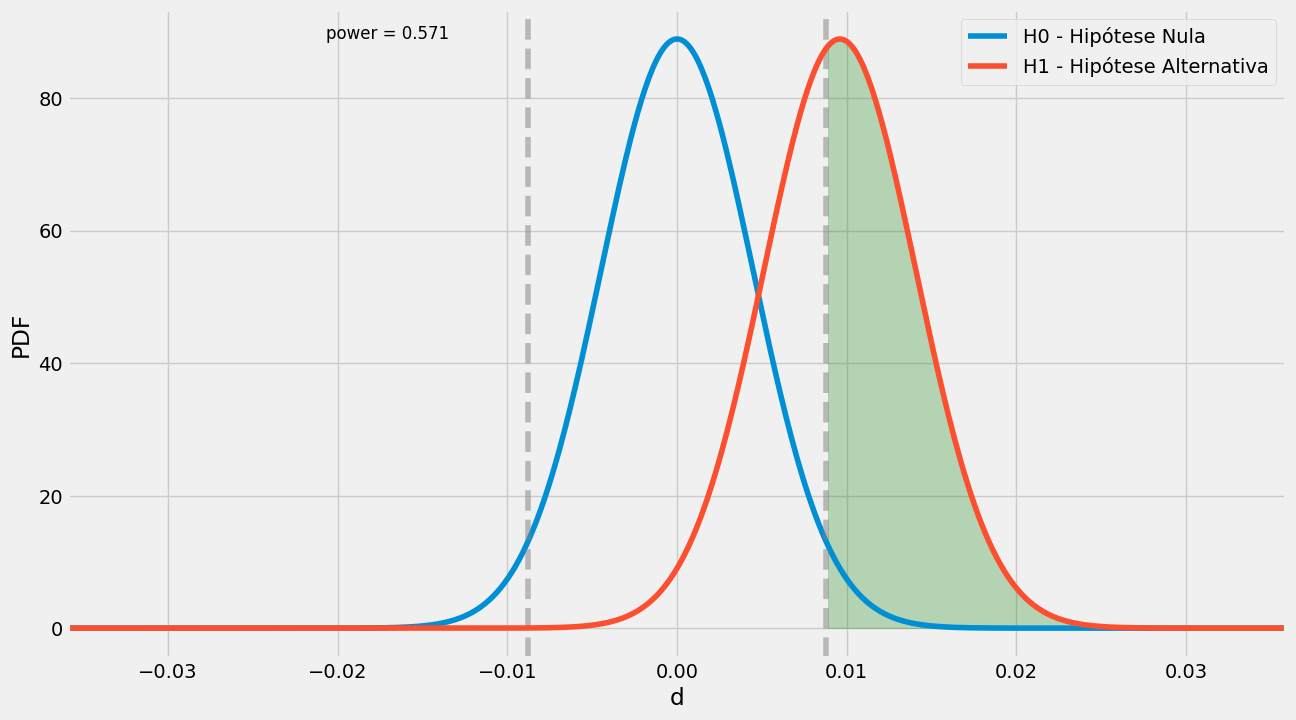

In [197]:
# Executa a função
abplot_func(2000, 2000, conversao_base, d_hat)

In [198]:
def zplot(area = 0.95, two_tailed = True, align_right = False):

    # Cria a área de plotagem
    fig = plt.figure(figsize = (12, 6))
    ax = fig.subplots()
    
    # Cria a distribuição normal
    norm = scs.norm()
    
    # Cria os pontos de dados para o plot
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    ax.plot(x, y)

    # Código para preencher áreas para testes bidirecionais
    if two_tailed:
        left = norm.ppf(0.5 - area / 2)
        right = norm.ppf(0.5 + area / 2)
        ax.vlines(right, 0, norm.pdf(right), color = 'grey', linestyle = '--')
        ax.vlines(left, 0, norm.pdf(left), color = 'grey', linestyle = '--')

        ax.fill_between(x, 0, y, color = 'grey', alpha = 0.25, where = (x > left) & (x < right))
        
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), 
                 fontsize = 12, 
                 rotation = 90, 
                 va = "bottom", 
                 ha = "right")
        plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right), 
                 fontsize = 12, 
                 rotation = 90, 
                 va = "bottom", 
                 ha = "left")
    
    # Para testes de uma cauda
    else:
        # Alinhamento à direita
        if align_right:
            left = norm.ppf(1-area)
            ax.vlines(left, 0, norm.pdf(left), color = 'grey', linestyle = '--')
            ax.fill_between(x, 0, y, color = 'grey', alpha = 0.25, where = x > left)
            plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), 
                     fontsize = 12, 
                     rotation = 90, 
                     va = "bottom", 
                     ha = "right")
        
        # Alinhamento à esquerda
        else:
            right = norm.ppf(area)
            ax.vlines(right, 0, norm.pdf(right), color = 'grey', linestyle = '--')
            ax.fill_between(x, 0, y, color = 'grey', alpha = 0.25, where = x < right)
            plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right), 
                     fontsize = 12, 
                     rotation = 90, 
                     va = "bottom", 
                     ha = "left")

    # Incluímos texto no plot
    plt.text(0, 0.1, "Área Sombreada = {0:.3f}".format(area), fontsize = 12, ha = 'center')
    
    # Labels
    plt.xlabel('z')
    plt.ylabel('PDF')

    plt.show()

In [199]:
# Print do valor z
print(z)
print(z_val(sig_level = 0.05, two_tailed = False))
print(z > z_val(sig_level = 0.05, two_tailed = False))

3.1004562649078355
1.6448536269514722
True


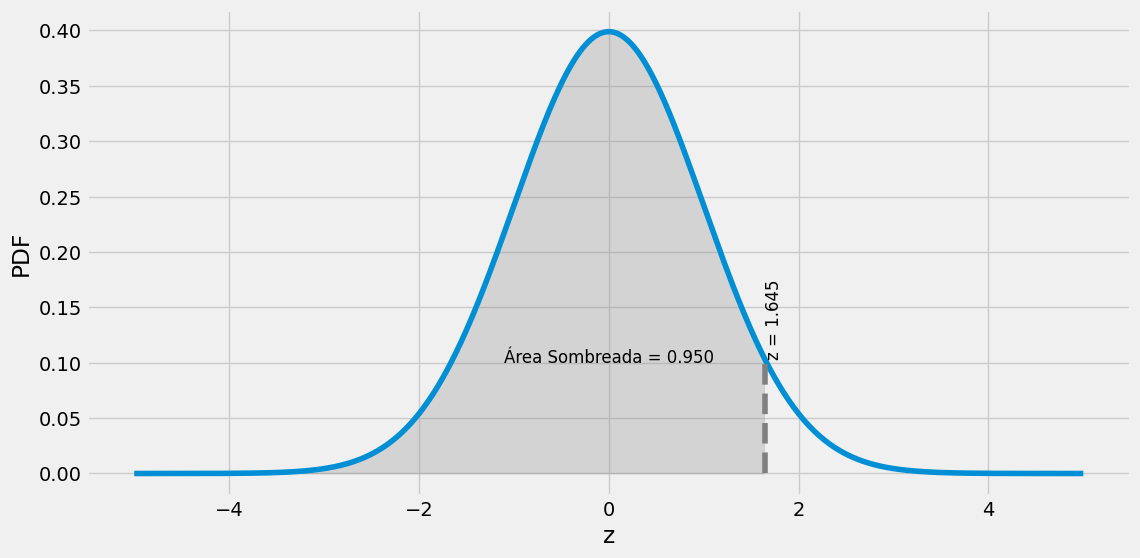

In [200]:
# Plot de z
zplot(area = 0.95, two_tailed = False, align_right = False)

In [202]:
# Calculamos os valores de z alfa e beta
sig_level = 0.05
beta = 0.2
k = N_psa/N_ad
standard_norm = scs.norm(0, 1)
Z_beta = standard_norm.ppf(1-beta)
Z_alpha = standard_norm.ppf(1-sig_level)
print(Z_beta)
print(Z_alpha)

0.8416212335729143
1.6448536269514722


Vamos calcular o tamanho mínimo necessário para a amostra.

In [205]:
# Função para encontrar o tamanho mínimo da amostra
def calcula_tamanho_min_amostra(N_psa, 
                                N_ad, 
                                p_psa, 
                                p_ad, 
                                power = 0.8, 
                                sig_level = 0.05, 
                                two_sided = False):
   
    k = N_psa/N_ad
    
    # Distribuição normal para determinar os valores z
    standard_norm = scs.norm(0, 1)

    # Encontramos o valor de z para o poder estatístico
    Z_beta = standard_norm.ppf(power)
    
    # Encontramos z alfa
    if two_sided == True:
        Z_alpha = standard_norm.ppf(1-sig_level/2)
    else:
        Z_alpha = standard_norm.ppf(1-sig_level)

    # Probabilidade agrupada
    pooled_prob = (p_psa + p_ad) / 2

    # Tamanho mínimo da amostra
    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2 / efeito_min**2)    

    return min_N

In [206]:
# Calculamos o tamanho mínimo da amostra com two_sided = True
calcula_tamanho_min_amostra(N_psa, N_ad, p_psa, p_ad, power = 0.8, sig_level = 0.05, two_sided = True)

3432.0895730810057

In [207]:
# Calculamos o tamanho mínimo da amostra com two_sided = False
calcula_tamanho_min_amostra(N_psa, N_ad, p_psa, p_ad, power = 0.8, sig_level = 0.05, two_sided = False)

2703.4546239930773

Agora vamos calcular o tamanho mínimo da amostra considerando nosso baseline.

In [208]:
conversao_base + efeito_min

0.025355860394223564

In [209]:
# Calcula a probabilidade agrupada
probabilidade_agrupada = (conversao_base + conversao_base + efeito_min) / 2
probabilidade_agrupada

0.020557586357570233

In [210]:
# Soma de z alfa e beta
Z_beta + Z_alpha

2.4864748605243863

In [211]:
# Tamanho mínimo da amostra para o baseline
min_N = (2 * probabilidade_agrupada * (1 - probabilidade_agrupada) * (Z_beta + Z_alpha)**2 / efeito_min**2)
min_N

2703.4546239930773

Poder estatístico para o baseline.

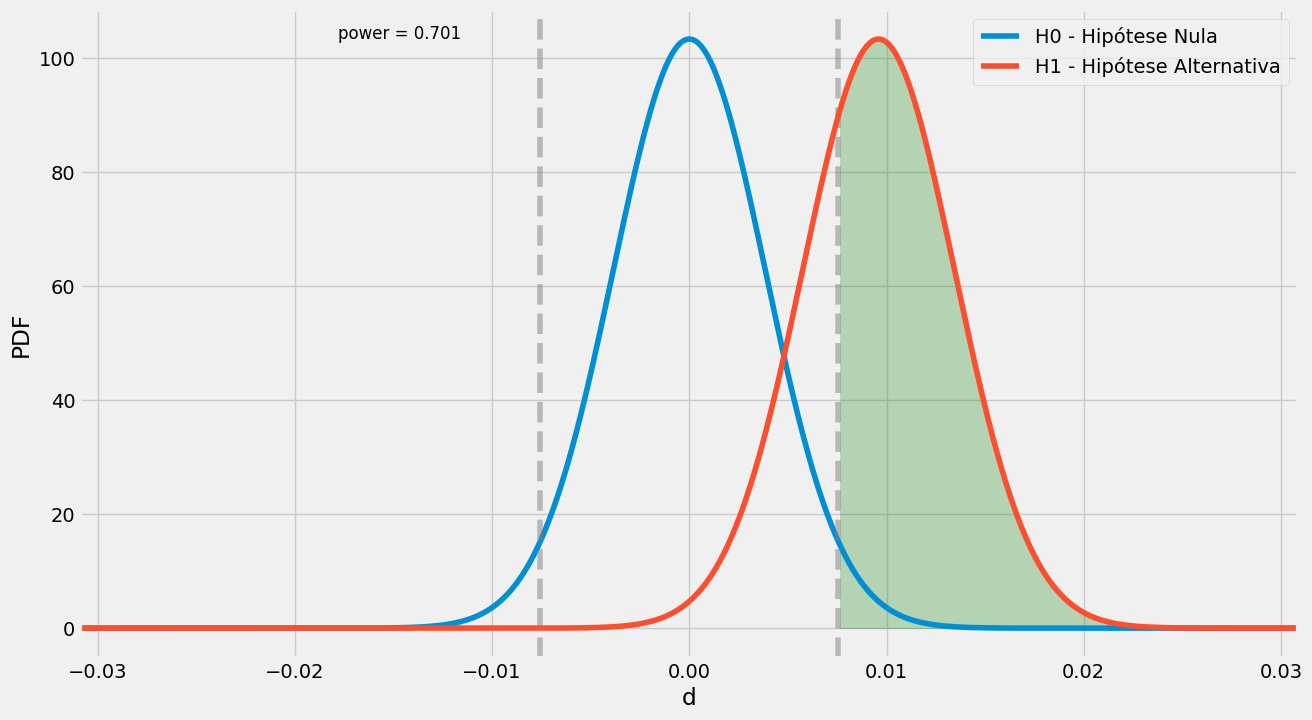

In [216]:
# Executa a função para 984 amostras
abplot_func(N_psa = 2703, 
            N_ad = 2703, 
            bcr = p_psa, 
            d_hat = p_ad - p_psa, 
            sig_level = 0.05, 
            show_p_value = False, 
            show_legend = True)

Poder estatístico para o tamanho de amostra calculado.

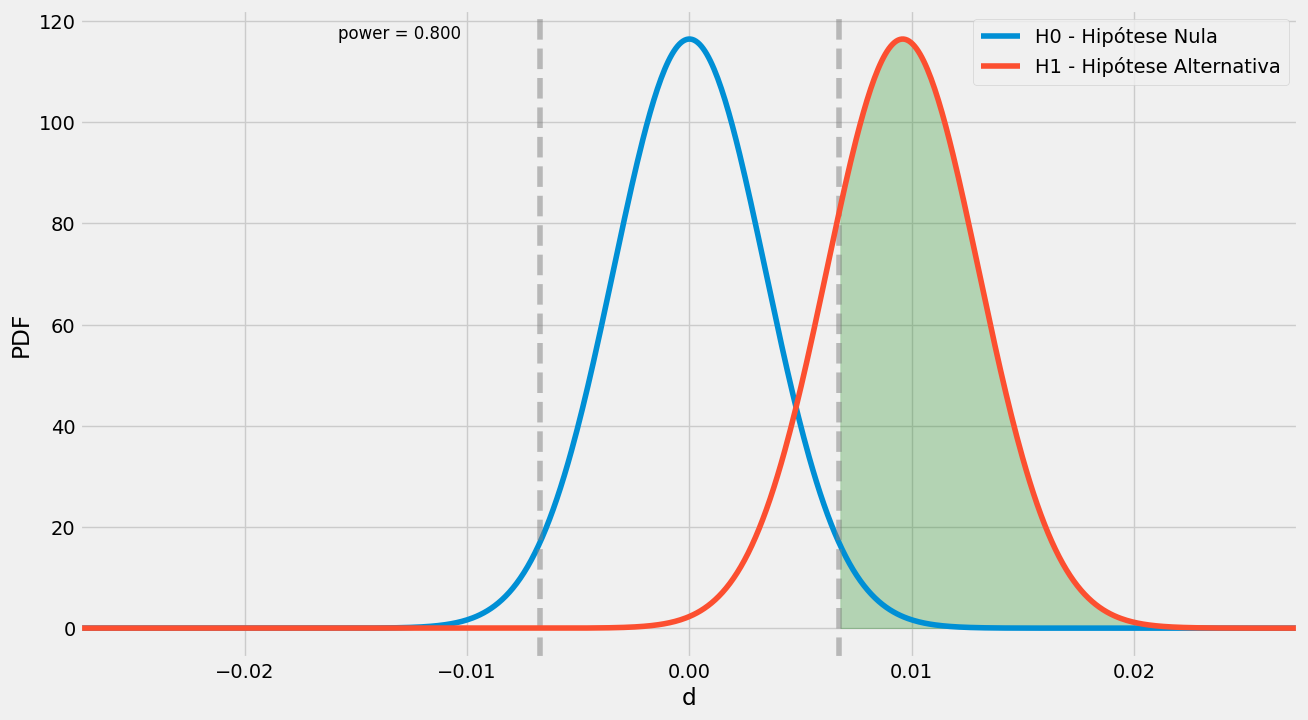

In [217]:
# Executa a função para 1249 amostras
abplot_func(N_psa = 3432, 
            N_ad = 3432, 
            bcr = p_psa, 
            d_hat = p_ad - p_psa, 
            sig_level = 0.05, 
            show_p_value = False, 
            show_legend = True)

## Conclusão e Considerações Finais

O poder calculado para este tamanho de amostra foi de aproximadamente 0,80. Portanto, para afirmar que assistir ao anúncio realmente aumentou a taxa de conversão precisamos de pelos menos 3432 amostras.